In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind


pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

def get_IQR(x, a):
    perc25 = x[a].quantile(0.25)
    perc75 = x[a].quantile(0.75)
    IQR = perc75 - perc25
    f = perc25 - 1.5*IQR
    l = perc75 + 1.5*IQR
    print(a + ' : ',
          'count={}; '.format(x[a].count()),
          'min={}; '.format(x[a].min()),
          'max={}; '.format(x[a].max()),
          'std={}; '.format(x[a].std()),
          'median={}; '.format(x[a].median()),
          '25={}; '.format(perc25),
          '75={}; '.format(perc75),
          'IQR={}; '.format(IQR),
          'f={}; '.format(f), 'fcount={}; '.format(x[x[a] < f][a].count()),
          'l={}; '.format(l), 'lcount={}; '.format(x[x[a] > l][a].count())
         )
          
    
stud_math = pd.read_csv('stud_math.csv')
stud_math = stud_math.rename(str.lower, axis='columns')
stud_math = stud_math.rename(columns={"studytime, granular": "studytime_granular"})


def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
            
display(stud_math.head())
display(stud_math.info())

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

None

- Начнем с числовых данных:

In [2]:
stud_math.describe()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


- Рассмотрим столбцы studytime и studytime_granular

In [3]:
stud_math['studytime'].corr(stud_math['studytime_granular'])

-0.9999999999999991

studytime и studytime_granular имеют полностью отрицательную корреляцию, studytime_granular можно удалить

In [4]:
del stud_math['studytime_granular']
stud_math.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


- рассмотрим колонку age:


None count = 0


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

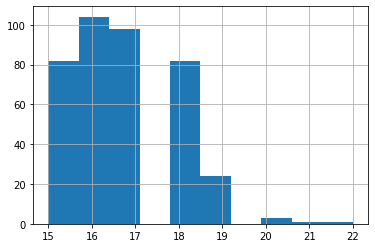

In [5]:
print('None count =', stud_math.age.isna().sum())
stud_math.age.hist()
stud_math.age.describe()

Выбросами являются записи, где age >= 20 лет.

Выбросами являются записи, где age >= 20 лет. Удаляем  2 из 395


count    393.000000
mean      16.671756
std        1.231658
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       20.000000
Name: age, dtype: float64

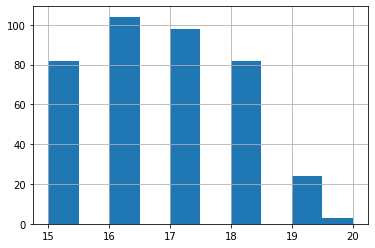

In [6]:
print('Выбросами являются записи, где age >= 20 лет. Удаляем ', stud_math.loc[stud_math['age'] > 20]['age'].count(), 'из', stud_math['age'].count())
stud_math = stud_math.loc[stud_math['age'] <= 20] # удаляем выбросы
stud_math.age.hist()
stud_math.age.describe()

- рассмотрим колонку failures:

None count = 22 ; 5.6 %


count    371.000000
mean       0.323450
std        0.718832
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

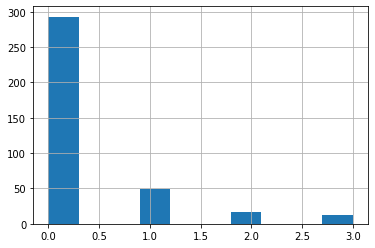

In [7]:
print('None count =', stud_math.failures.isna().sum(), ';',
      round(stud_math.failures.isna().sum()/len(stud_math)*100, 2), '%')
stud_math.failures.hist()
stud_math.failures.describe()

- Это колонка имеет значение: количество внеучебных неудач (n, если 1<=n<=3, иначе 0). Эта колонка больше похожа на категорию, где 1 - 1 происшествие, 2 - 2 происшествия, 3 - 3 происшествия, 0 - 0 или 3+ происшествий. Мы видим пропущенные данные в 22 строках, запоним их модой, т е 0

In [8]:
stud_math.failures = stud_math.failures.apply(lambda x: 0 if pd.isnull(x) else x)
stud_math.failures.describe()

count    393.000000
mean       0.305344
std        0.702326
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

- рассмотрим колонку absences:

None count = 12 ; 3.05 %


count    381.000000
mean       7.267717
std       23.521585
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

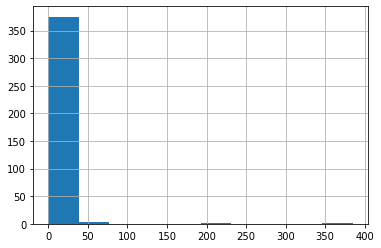

In [9]:
print('None count =', stud_math.absences.isna().sum(), ';',
      round(stud_math.absences.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.absences.hist()
stud_math.absences.describe()

- Мы имеем 12 пропущенных значений, но чтобы их заполнить нам надо знать медиану.  По графику можно заметить выбросы, которые сильно искажают меры. Их надо заменить прежде чем заменять пропуски.

In [10]:
get_IQR(stud_math, 'absences')

absences :  count=381;  min=0.0;  max=385.0;  std=23.521585434468786;  median=4.0;  25=0.0;  75=8.0;  IQR=8.0;  f=-12.0;  fcount=0;  l=20.0;  lcount=17; 


count    376.000000
mean       5.284574
std        6.328465
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       40.000000
Name: absences, dtype: float64

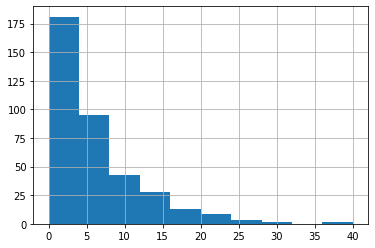

In [11]:
stud_math[stud_math.absences <= 50].absences.hist()
stud_math[stud_math.absences <= 50].absences.describe()

- Заменим выбросы на None и затем заполним значения так, чтобы график не изменился:

count    393.000000
mean       5.100509
std        5.800088
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       30.000000
Name: absences, dtype: float64

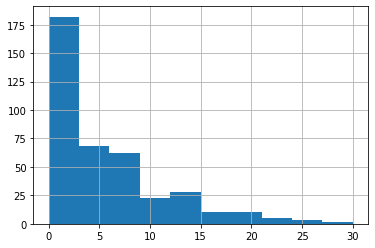

In [12]:
stud_math.absences = stud_math.absences.apply(lambda x: None if x > 30 else x)
stud_math['absences'].interpolate(method='linear', direction = 'forward', inplace=True)
stud_math.absences.hist()
stud_math.absences.describe()

- Рассмотрим столбец score — баллы по госэкзамену по математик

None count = 6 ; 1.53 %


count    387.000000
mean      52.338501
std       22.952906
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

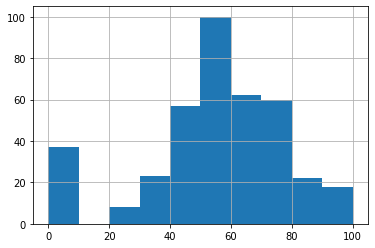

In [13]:
print('None count =', stud_math.score.isna().sum(), ';',
      round(stud_math.score.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.score.hist()
stud_math.score.describe()

- Значения с 0 похожи на выбросы, но мы их оставим, т. к. это может означать, что студент не пришел на экзамен, или провалил 
его полностью. Т е эти значения тоже важны.
Заполним пустые значения:

In [14]:
stud_math['score'].interpolate(method='linear', direction = 'forward', inplace=True)
stud_math.score.describe()

count    393.000000
mean      52.449109
std       22.844527
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Теперь рассмотрим столбцы-категории. 

- medu. Образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

None count = 3 ; 0.76 %


count    390.000000
mean       2.753846
std        1.097285
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

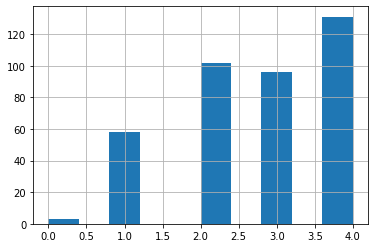

In [15]:
print('None count =', stud_math.medu.isna().sum(), ';',
      round(stud_math.medu.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.medu.hist()
stud_math.medu.describe()

Заполним пустые значения модой:

In [16]:
stud_math.medu = stud_math.medu.apply(lambda x: 4.0 if pd.isnull(x) else x) 
stud_math.medu.describe()

count    393.000000
mean       2.763359
std        1.098459
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

- fedu. образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

None count = 24 ; 6.11 %


count    369.000000
mean       2.623306
std        2.231591
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

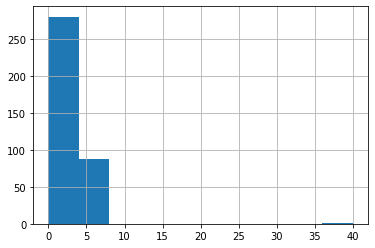

In [17]:
print('None count =', stud_math.fedu.isna().sum(), ';',
      round(stud_math.fedu.isna().sum()/len(stud_math)*100, 2), '%')
stud_math.fedu.hist()
stud_math.fedu.describe()

В поле fedu обнаружилось более 20 неверных значений, если зампенить модой их все, то будет значительной изменение 
графика. Однако у нас есть поле medu (образование матери), которые должны влиять на оценки ученика одинаково. 

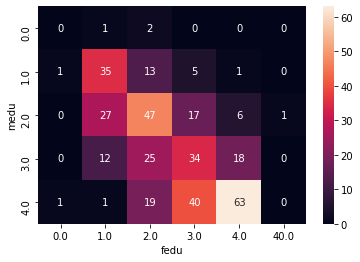

In [18]:
sns.heatmap(pd.crosstab(stud_math['medu'], stud_math['fedu']), annot = True)

Также можно заметить, что чаще всего образование матери и отца совпадают, поэтому заполним недостающие значения из колонки medu

count    393.000000
mean       2.549618
std        1.087126
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

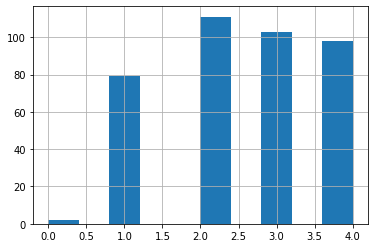

In [19]:
stud_math.fedu = stud_math.apply(lambda x: x.medu if x.fedu == 40.0 or pd.isnull(x.fedu) else x.fedu, axis=1)
stud_math.fedu.hist()
stud_math.fedu.describe()

- рассмотрим столбец school - аббревиатура школы, в которой учится ученик

None count = 0 ; 0.0 %


count     393
unique      2
top        GP
freq      348
Name: school, dtype: object

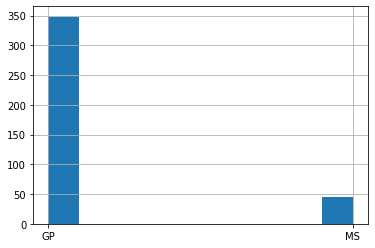

In [20]:
print('None count =', stud_math.school.isna().sum(), ';',
      round(stud_math.school.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.school.hist()
stud_math.school.describe()

Заполнен полностью, ничего не надо менять. Заметим, что большая чать учеников учатся в одной школе. 
Во второй школе очень мало учеников.

- рассмотрим столбец sex. пол ученика ('F' - женский, 'M' - мужской)

In [ ]:
print('None count =', stud_math.sex.isna().sum(), ';',
      round(stud_math.sex.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.sex.hist()
stud_math.sex.describe()

Девочек и мальчиков примерно одинаковое количество

- address. тип адреса ученика ('U' - городской, 'R' - за городом)

In [ ]:
print('None count =', stud_math.address.isna().sum(), ';',
      round(stud_math.address.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.address.hist()
stud_math.address.describe()

Здесь есть пропущенные значения, можно предположить, что school может нам помочь.

In [ ]:
sns.heatmap(pd.crosstab(stud_math['address'], stud_math['school']), annot = True)

В school='GP' учатся в остовном ученики из города. Вероятно сама школа находится в городе. Так и заполним пустые поля address

In [ ]:
stud_math.address = stud_math.apply(lambda x: 'U' if x.school == 'GP' else 'R', axis=1)
stud_math.address.describe()

- studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [ ]:
print('None count =', stud_math.studytime.isna().sum(), ';',
      round(stud_math.studytime.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.studytime.hist()
stud_math.studytime.describe()

Найдены пустые значения, их всего 7, можно заменить модой - 2

In [ ]:
stud_math.studytime = stud_math.studytime.apply(lambda x: 2.0 if pd.isnull(x) else x)
stud_math.studytime.describe()

- schoolsup — дополнительная образовательная поддержка (yes или no)

In [ ]:
print('None count =', stud_math.schoolsup.isna().sum(), ';',
      round(stud_math.schoolsup.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.schoolsup.hist()
stud_math.schoolsup.describe()

Не большое количество пустых значений заменяем на моду:

In [ ]:
stud_math.schoolsup = stud_math.schoolsup.apply(lambda x: 'no' if pd.isnull(x) else x)
stud_math.schoolsup.describe()

- nursery — посещал детский сад (yes или no)

In [ ]:
print('None count =', stud_math.nursery.isna().sum(), ';',
      round(stud_math.nursery.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.nursery.hist()
stud_math.nursery.describe()

In [ ]:
stud_math.nursery = stud_math.nursery.apply(lambda x: 'yes' if pd.isnull(x) else x)
stud_math.nursery.describe()

In [ ]:
print('None count =', stud_math.higher.isna().sum(), ';',
      round(stud_math.higher.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.higher.hist()
stud_math.higher.describe()

In [ ]:
stud_math.higher = stud_math.higher.apply(lambda x: 'yes' if pd.isnull(x) else x)
stud_math.higher.hist()

- freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [ ]:
print('None count =', stud_math.freetime.isna().sum(), ';',
      round(stud_math.freetime.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.freetime.hist()
stud_math.freetime.describe()

In [ ]:
stud_math.freetime = stud_math.freetime.apply(lambda x: 3.0 if x == 'nan' or pd.isnull(x) else x)
stud_math.freetime.describe()

- goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [ ]:
print('None count =', stud_math.goout.isna().sum(), ';',
      round(stud_math.goout.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.goout.hist()
stud_math.goout.describe()

In [ ]:
stud_math.goout = stud_math.goout.apply(lambda x: None if x == 'nan' else x)
stud_math.goout = stud_math.goout.interpolate(method='pad')
stud_math.goout.hist()
stud_math.goout.describe()

- health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [ ]:
print('None count =', stud_math.health.isna().sum(), ';',
      round(stud_math.health.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.health.hist()
stud_math.health.describe()

Есть значения 'nan', заполним их медианой

In [ ]:
stud_math.health = stud_math.health.apply(lambda x: '5.0' if x == 'nan' else x)
stud_math.health.hist()
stud_math.health.describe()

- pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [ ]:
print('None count =', stud_math.pstatus.isna().sum(), ';',
      round(stud_math.pstatus.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.pstatus.hist()
stud_math.pstatus.describe()

заполним пропущенные значения модой

In [ ]:
stud_math.pstatus = stud_math.apply(lambda x: 'T' if pd.isnull(x.pstatus) else x.pstatus, axis=1)
stud_math.pstatus.hist()
stud_math.pstatus.describe()

- столбец famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [ ]:
print('None count =', stud_math.famsize.isna().sum(), ';',
      round(stud_math.famsize.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.famsize.hist()
stud_math.famsize.describe()

Рассмотрим связь с показателем, живет ли семья вместе:

In [ ]:
sns.heatmap(pd.crosstab(stud_math['pstatus'], stud_math['famsize']), annot = True)

Видим, что если указан pstatus, то примерно одинаково распределяется признак famsize. GT3: 90% T, LE3: 87% T. 
Можно заполнить строки равномерно, чтобы отношение осталось прежним: 

In [ ]:
stud_math.famsize = stud_math.famsize.interpolate(method='pad')
stud_math.famsize = stud_math.famsize.apply(lambda x: 'GT3' if pd.isnull(x) else x)

stud_math.famsize.hist()
stud_math.famsize.describe()

- internet — наличие интернета дома (yes или no)

In [ ]:
print('None count =', stud_math.internet.isna().sum(), ';',
      round(stud_math.internet.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.internet.hist()
stud_math.internet.describe()

Имеются пропуски в данных, их можно попробовать заполнить, исходя из данных столбца address

In [ ]:
print('Количество незаполненных internet для учеников за городом',
      len(stud_math[pd.isnull(stud_math.internet)&(stud_math.address=='R')]))
sns.heatmap(pd.crosstab(stud_math['internet'], stud_math['address']), annot = True)

Можно заметить, что у 30% населения за городом нет интеренета, а в городе интернете нет только у 16% учеников. Также мы знаем, что из 34 пропусков всего 3 - ученики за городом, по статистике 1 из них без интернета, но этим можно принебречь, и заполнит все пропуски модой - "yes"

In [ ]:
stud_math.internet = stud_math.internet.apply(lambda x: 'yes' if pd.isnull(x) else x)

stud_math.internet.hist()
stud_math.internet.describe()

- romantic — в романтических отношениях (yes или no)

In [ ]:
print('None count =', stud_math.romantic.isna().sum(), ';',
      round(stud_math.romantic.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.romantic.hist()
stud_math.romantic.describe()

В столбце 31 пропуск, заполним данные равномерно:

In [ ]:
stud_math['romantic'].interpolate(method='pad')
stud_math['romantic'] = stud_math.romantic.apply(lambda x: 'no' if pd.isnull(x) else x)
stud_math.romantic.hist()
stud_math.romantic.describe()

- reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [ ]:
print('None count =', stud_math.reason.isna().sum(), ';',
      round(stud_math.reason.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.reason.hist()
stud_math.reason.describe()

Есть небольшое количество пропущенных значений, заполним их модой:

In [ ]:
stud_math.reason = stud_math.reason.apply(lambda x: 'course' if pd.isnull(x) else x)
stud_math.reason.hist()
stud_math.reason.describe()

- mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [ ]:
print('None count =', stud_math.mjob.isna().sum(), ';',
      round(stud_math.mjob.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.mjob.hist()
stud_math.mjob.describe()

Мы имеем 19 пустых значений, их можно заполнить исходя из данных об образовании матери:

In [ ]:
sns.heatmap(pd.crosstab(stud_math['mjob'], stud_math['medu']), annot = True)

Можно заметить, что если мать получила высшее образовании, то гораздо чаще она является учителем. В остальных случаях other

In [ ]:
stud_math.mjob = stud_math.apply(lambda x: 'teacher' if pd.isnull(x.mjob) and x.medu == '4.0' else x.mjob, axis=1)
stud_math.mjob = stud_math.mjob.apply(lambda x: 'other' if pd.isnull(x) else x)
stud_math.mjob.hist()
stud_math.mjob.describe()

- fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [ ]:
print('None count =', stud_math.fjob.isna().sum(), ';',
      round(stud_math.fjob.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.fjob.hist()
stud_math.fjob.describe()

In [ ]:
sns.heatmap(pd.crosstab(stud_math['fjob'], stud_math['fedu']), annot = True)

В этом поле много пропусков, нельзя заполнить их просто заполнить модой. При рассмотрении связи образования отца с работой, видим, что каждый 3 отец работает в "services", не зависимо от образования, остальные в основном в "other". 

In [ ]:
stud_math.loc[pd.isnull(stud_math.fjob)&(stud_math.index%3==0), ['fjob']] = 'services'
stud_math.fjob = stud_math.fjob.apply(lambda x: 'other' if pd.isnull(x) else x)

stud_math.fjob.hist()
stud_math.fjob.describe()

- guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [ ]:
print('None count =', stud_math.guardian.isna().sum(), ';',
      round(stud_math.guardian.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.guardian.hist()
stud_math.guardian.describe()

Чаще всего опекун мама, не смотря на обстановку в доме или профессии родителей, поэтому заполним пропущенные значения "mother"

In [ ]:
stud_math.guardian = stud_math.guardian.apply(lambda x: 'mother' if pd.isnull(x) else x)

stud_math.guardian.hist()
stud_math.guardian.describe()

- famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [ ]:
print('None count =', stud_math.famrel.isna().sum(), ';',
      round(stud_math.famrel.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.famrel.hist()
stud_math.famrel.describe()

Заполним пропуски медианой:

In [ ]:
stud_math.famrel = stud_math.famrel.apply(lambda x: 4.0 if x == 'nan' or x == '-1.0' or pd.isnull(x) else x)

stud_math.famrel.hist()
stud_math.famrel.describe()

- traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [ ]:
print('None count =', stud_math.traveltime.isna().sum(), ';',
      round(stud_math.traveltime.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.traveltime.hist()
stud_math.traveltime.describe()

В этом столбце есть неверные и пропущенные значения, которые надо изменить. Рассмотрим связь между временем в пути до школы и местом жительства. Мы видим, что, если ученик живет за городом, то то он трати на дорогу в основном 15-30 мин. Городские жители - менее 15 мин

In [ ]:
sns.heatmap(pd.crosstab(stud_math['traveltime'], stud_math['address']), annot = True)

In [ ]:
stud_math.traveltime = stud_math.apply(lambda x: '2.0' if x.traveltime == 'nan' and x.address == 'R' else x.traveltime, axis=1)
stud_math.traveltime = stud_math.traveltime.apply(lambda x: '1.0' if x == 'nan' else x)

stud_math.traveltime.hist()
stud_math.traveltime.describe()

- famsup — семейная образовательная поддержка (yes или no)

In [ ]:
print('None count =', stud_math.famsup.isna().sum(), ';',
      round(stud_math.famsup.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.famsup.hist()
stud_math.famsup.describe()

В данном столбце 10.0% пропусков, который нужно заполнить. 
У нас есть данные о работе и образовании родителей, это должно влиять семейную образовательную поддержку:

In [ ]:
sns.heatmap(pd.crosstab(stud_math['famsup'], stud_math['mjob']), annot = True)

In [ ]:
sns.heatmap(pd.crosstab(stud_math['famsup'], stud_math['fjob']), annot = True)

Можно заметить, что родители-учителя и родители, работающие в сфере здоровья > 70% случаев помогают своим детям с учебой

In [ ]:
stud_math.famsup = stud_math.apply(lambda x: 'yes' if pd.isnull(x.famsup) and (x.mjob == 'teacher' or x.fjob == 'teacher' or x.mjob == 'health' or x.fjob == 'health') else x.famsup, axis=1)

Теперь рассмотрим связь с образованием родителей:

In [ ]:
sns.heatmap(pd.crosstab(stud_math['famsup'], stud_math['medu']), annot = True)

In [ ]:
sns.heatmap(pd.crosstab(stud_math['famsup'], stud_math['fedu']), annot = True)

Можно заметить, что родители с образованием 1-4 класса чаще не помогают с учебой детям. Остальные строки можно заполнит модой:

In [ ]:
stud_math.famsup = stud_math.apply(lambda x: 'no' if pd.isnull(x.famsup) and x.medu == '1.0' and x.fedu == '1.0' else x.famsup, axis=1)
stud_math.famsup = stud_math.apply(lambda x: 'yes' if pd.isnull(x.famsup) else x.famsup, axis=1)
stud_math.famsup.hist()
stud_math.famsup.describe()

- paid — дополнительные платные занятия по математике (yes или no)

In [ ]:
print('None count =', stud_math.paid.isna().sum(), ';',
      round(stud_math.paid.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.paid.hist()
stud_math.paid.describe()

В столбце имеются много пропусков 10.26 %, попробуем вычислить недостающие значения по информации, хочет ли ученик получить высшее образование. По графику мы можем точно сказать, что если ученик не собирается получать высшее образование, то и платить за дополнительные занятия он не будет

In [ ]:
sns.heatmap(pd.crosstab(stud_math['paid'], stud_math['higher']), annot = True)

Если же у ученика проблемы со здоровьем, то родители чаще прибегнут к платным занятиям:

In [ ]:
sns.heatmap(pd.crosstab(stud_math['paid'], stud_math['health']), annot = True)

Также мамы-учителя чаще оплачивают дополнительные занятия:

In [ ]:
sns.heatmap(pd.crosstab(stud_math['paid'], stud_math['mjob']), annot = True)

В остальных случаях ставим значение моды 'no':

In [ ]:
stud_math.paid = stud_math.apply(lambda x: 'no' if pd.isnull(x.paid) and x.higher == 'no' else x.paid, axis=1)
stud_math.paid = stud_math.apply(lambda x: 'yes' if pd.isnull(x.paid) and x.health == '1.0' else x.paid, axis=1)
stud_math.paid = stud_math.apply(lambda x: 'yes' if pd.isnull(x.paid) and x.mjob == 'teacher' else x.paid, axis=1)
stud_math.paid = stud_math.apply(lambda x: 'no' if pd.isnull(x.paid) else x.paid, axis=1)
stud_math.paid.hist()
stud_math.paid.describe()

- activities — дополнительные внеучебные занятия (yes или no)

In [ ]:
print('None count =', stud_math.activities.isna().sum(), ';',
      round(stud_math.activities.isna().sum()/len(stud_math)*100, 2), '%')

stud_math.activities.hist()
stud_math.activities.describe()

Т к пропусков немного, заполним их модой:

In [ ]:
stud_math.activities = stud_math.activities.apply(lambda x: 'yes' if pd.isnull(x) else x)

stud_math.activities.hist()
stud_math.activities.describe()

-------------------------------------------------------------

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'freetime', 'famrel','goout', 'health']:
    get_stat_dif(col)